<a href="https://colab.research.google.com/github/davidviana/clusters/blob/main/Atividade_Swift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import math as Math
from tkinter import font
import seaborn as sns
import datetime

In [108]:
from matplotlib.cbook import get_label
#função de plotar gráficos

def plot(st, dados):
  g = sns.countplot(x = st, data=dados, orient='h')
  g.set_ylabel('Valores')
  sizes = []

  for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x() + p.get_width()/1.6, height + 200, '{:1.2f}%'.format(height/116581 * 100), ha='center', va='bottom')
  
  g.set_ylim(0, max(sizes) * 1.1)



In [109]:
def ordenador_cluster(cluster_nome, target_nome, df, origem):
  agrp = df.groupby(cluster_nome)[target_nome].mean().reset_index()
  agrp_ordenado = agrp.sort_values(by=target_nome, ascending=origem).reset_index(drop=True)
  agrp_ordenado['score'] = agrp_ordenado.index
  juntando_cluster = pd.merge(df, agrp_ordenado [[cluster_nome, 'score']], on=cluster_nome)



In [110]:
df = pd.read_csv('Swift_SALES.csv')
df_list = df[['id_cliente', 'id_pedido', 'item_id','preco','horario_pedido']]
df_list.head()

,id_cliente,id_pedido,item_id,preco,horario_pedido
0,06b8999e2fba1a1fbc88172c00ba8bc7,00e7ee1b050b8499577073aeb2a297a1,1,124.99,2020-05-16 15:05:35
1,8912fc0c3bbf1e2fbf35819e21706718,c1d2b34febe9cd269e378117d6681172,1,112.99,2020-11-09 00:50:13
2,8912fc0c3bbf1e2fbf35819e21706718,c1d2b34febe9cd269e378117d6681172,2,112.99,2020-11-09 00:50:13
3,f0ac8e5a239118859b1734e1087cbb1f,b1a5d5365d330d10485e0203d54ab9e8,1,124.99,2020-05-07 20:11:26
4,6bc8d08963a135220ed6c6d098831f84,2e604b3614664aa66867856dba7e61b7,1,106.99,2021-02-03 19:45:40


In [111]:
# Recency
df_compra = df[['id_cliente', 'horario_pedido']]
df_compra = df.groupby('id_cliente') ['horario_pedido'].max()
df_compra = df_compra.reset_index()
df_compra.columns = ['id_cliente', 'data_max']

In [112]:
df_compra['data_max'] = pd.to_datetime(df_compra['data_max'])
df_compra['recency'] = (datetime.datetime.today() - df_compra['data_max']).dt.days
df_compra.head()

,id_cliente,data_max,recency
0,00012a2ce6f8dcda20d059ce98491703,2020-11-14 16:08:26,723
1,000161a058600d5901f007fab4c27140,2020-07-16 09:40:32,844
2,0001fd6190edaaf884bcaf3d49edf079,2020-02-28 11:06:43,983
3,0002414f95344307404f0ace7a26f1d5,2020-08-16 13:09:20,813
4,000379cdec625522490c315e70c7a9fb,2021-04-02 13:42:17,584


In [113]:
df_cliente = pd.merge(df_list, df_compra[['id_cliente', 'recency']], on = 'id_cliente')
df_cliente.head()

,id_cliente,id_pedido,item_id,preco,horario_pedido,recency
0,06b8999e2fba1a1fbc88172c00ba8bc7,00e7ee1b050b8499577073aeb2a297a1,1,124.99,2020-05-16 15:05:35,905
1,8912fc0c3bbf1e2fbf35819e21706718,c1d2b34febe9cd269e378117d6681172,1,112.99,2020-11-09 00:50:13,728
2,8912fc0c3bbf1e2fbf35819e21706718,c1d2b34febe9cd269e378117d6681172,2,112.99,2020-11-09 00:50:13,728
3,f0ac8e5a239118859b1734e1087cbb1f,b1a5d5365d330d10485e0203d54ab9e8,1,124.99,2020-05-07 20:11:26,914
4,6bc8d08963a135220ed6c6d098831f84,2e604b3614664aa66867856dba7e61b7,1,106.99,2021-02-03 19:45:40,642


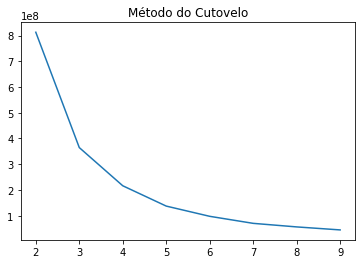

In [114]:
# metodo do cotovelo
x = df_cliente[['recency']]

wcss = []
for n in range(2, 10):
    kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=len(x), random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 10), wcss)
plt.title('Método do Cutovelo')
plt.show()

In [115]:
# distance

def optimal_clusters(wcss, cluster_final):
  x1, y1 = 2, wcss[0]
  x2, y2 = cluster_final, wcss[-1]

  distances = []
  for i in range(len(wcss)):
      x0 = i + 1
      y0 = wcss[i]
      numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
      denominator = Math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
      res = (numerator/denominator)
      distances.append(res)
    
  optimal_cluster = distances.index(max(distances)) + 2
  return optimal_cluster

In [116]:
optimal_clusters(wcss, 9)

4

In [117]:
KMeans = KMeans(n_clusters=4)
df_cliente['RecenciaCluster'] = KMeans.fit_predict(x)
df_cliente.head()

,id_cliente,id_pedido,item_id,preco,horario_pedido,recency,RecenciaCluster
0,06b8999e2fba1a1fbc88172c00ba8bc7,00e7ee1b050b8499577073aeb2a297a1,1,124.99,2020-05-16 15:05:35,905,1
1,8912fc0c3bbf1e2fbf35819e21706718,c1d2b34febe9cd269e378117d6681172,1,112.99,2020-11-09 00:50:13,728,2
2,8912fc0c3bbf1e2fbf35819e21706718,c1d2b34febe9cd269e378117d6681172,2,112.99,2020-11-09 00:50:13,728,2
3,f0ac8e5a239118859b1734e1087cbb1f,b1a5d5365d330d10485e0203d54ab9e8,1,124.99,2020-05-07 20:11:26,914,1
4,6bc8d08963a135220ed6c6d098831f84,2e604b3614664aa66867856dba7e61b7,1,106.99,2021-02-03 19:45:40,642,0


In [118]:
agrp = df_cliente.groupby('RecenciaCluster')['recency'].mean().reset_index()
agrp.head()

,RecenciaCluster,recency
0,0,618.415615
1,1,921.632989
2,2,751.188317
3,3,497.511147


In [119]:
agrp_ordenado = agrp.sort_values(by='recency', ascending=False).reset_index()
agrp_ordenado.head()

,index,RecenciaCluster,recency
0,1,1,921.632989
1,2,2,751.188317
2,0,0,618.415615
3,3,3,497.511147


In [120]:
agrp_ordenado['score'] = agrp_ordenado.index
agrp_ordenado = agrp_ordenado.drop(['index'], axis=1)
agrp_ordenado.head()

,RecenciaCluster,recency,score
0,1,921.632989,0
1,2,751.188317,1
2,0,618.415615,2
3,3,497.511147,3


In [121]:
juntando_cluster = pd.merge(df_cliente, agrp_ordenado [['RecenciaCluster', 'score']], on='RecenciaCluster')
juntando_cluster.tail()

,id_cliente,id_pedido,item_id,preco,horario_pedido,recency,RecenciaCluster,score
116576,ce2172509c4149d65212484eb761bc37,edcf1e1eeb52381be9388c90152be52d,1,289.49,2021-08-21 11:29:05,443,3,3
116577,ee1cfdc92e449920e25d3ca4ab4da4f6,2ef4a11b6e24fdfbb43b92cb5f95edff,1,19.00,2021-07-23 18:35:14,472,3,3
116578,ee1cfdc92e449920e25d3ca4ab4da4f6,2ef4a11b6e24fdfbb43b92cb5f95edff,2,39.90,2021-07-23 18:35:14,472,3,3
116579,ab0cf72dfe0538a63a57d6905ccb7b57,2c12150c742ae2fa48bc703964c16c5f,1,57.90,2021-07-28 17:55:27,467,3,3
116580,c61336d6c835632048f973d2f2db598d,9f7ba492c273ffac8f90a623b8eadd3b,1,11.90,2021-08-23 12:31:37,441,3,3


In [122]:
removendo_dados = juntando_cluster.drop(['RecenciaCluster'], axis=1)
removendo_dados.head()

,id_cliente,id_pedido,item_id,preco,horario_pedido,recency,score
0,06b8999e2fba1a1fbc88172c00ba8bc7,00e7ee1b050b8499577073aeb2a297a1,1,124.99,2020-05-16 15:05:35,905,0
1,f0ac8e5a239118859b1734e1087cbb1f,b1a5d5365d330d10485e0203d54ab9e8,1,124.99,2020-05-07 20:11:26,914,0
2,fd3a0b1bd209f0e7d420c9c3d1127613,574fe1739f65af76badd0999db300b4f,1,126.99,2020-03-23 15:10:17,959,0
3,fbd40c083aa8cddebb5265b2ba6aaf2e,e0b26f14d2bcc710bb02f77a4628763b,1,124.99,2020-05-16 10:00:49,905,0
4,10558ef4afea173bfb5e2cbe3d5b0bb5,eaae5bd20fb15d85aa673d9b7c0e8ca5,1,126.99,2020-03-18 23:04:36,963,0


In [123]:
df_final = removendo_dados.rename(columns={'score': 'Recência Score'})
df_final.head()

,id_cliente,id_pedido,item_id,preco,horario_pedido,recency,Recência Score
0,06b8999e2fba1a1fbc88172c00ba8bc7,00e7ee1b050b8499577073aeb2a297a1,1,124.99,2020-05-16 15:05:35,905,0
1,f0ac8e5a239118859b1734e1087cbb1f,b1a5d5365d330d10485e0203d54ab9e8,1,124.99,2020-05-07 20:11:26,914,0
2,fd3a0b1bd209f0e7d420c9c3d1127613,574fe1739f65af76badd0999db300b4f,1,126.99,2020-03-23 15:10:17,959,0
3,fbd40c083aa8cddebb5265b2ba6aaf2e,e0b26f14d2bcc710bb02f77a4628763b,1,124.99,2020-05-16 10:00:49,905,0
4,10558ef4afea173bfb5e2cbe3d5b0bb5,eaae5bd20fb15d85aa673d9b7c0e8ca5,1,126.99,2020-03-18 23:04:36,963,0


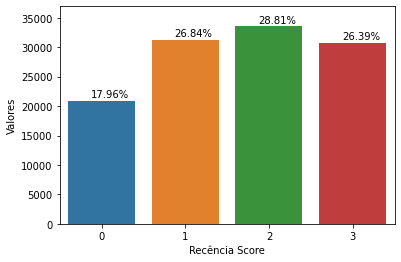

In [124]:
plot('Recência Score', df_final)

In [125]:
# Frequency
df_pedido = df[['id_cliente', 'item_id']]
df_pedido = df.groupby('id_cliente') ['item_id'].count()
df_pedido = df_pedido.reset_index()
df_pedido.columns = ['id_cliente', 'frequency']

df_pedido.tail()

,id_cliente,frequency
97250,fffcb937e9dd47a13f05ecb8290f4d3e,1
97251,fffecc9f79fd8c764f843e9951b11341,3
97252,fffeda5b6d849fbd39689bb92087f431,1
97253,ffff42319e9b2d713724ae527742af25,1
97254,ffffa3172527f765de70084a7e53aae8,2


In [126]:
# Monetary

df_receita = df[['id_cliente', 'id_pedido', 'preco']]
df_receita = df.groupby('id_cliente') ['preco'].sum()
df_receita = df_receita.reset_index()
df_receita.columns = ['id_cliente', 'monetary']
df_receita.tail()

,id_cliente,monetary
97250,fffcb937e9dd47a13f05ecb8290f4d3e,78.0
97251,fffecc9f79fd8c764f843e9951b11341,164.7
97252,fffeda5b6d849fbd39689bb92087f431,47.9
97253,ffff42319e9b2d713724ae527742af25,199.9
97254,ffffa3172527f765de70084a7e53aae8,21.8


In [127]:
rfm = pd.merge(df_pedido[['id_cliente', 'frequency']], df_receita[['id_cliente', 'monetary']], on = 'id_cliente')
rfm = pd.merge(rfm, df_cliente[['id_cliente', 'recency']], on='id_cliente')
rfm.tail()

,id_cliente,frequency,monetary,recency
116576,fffecc9f79fd8c764f843e9951b11341,3,164.7,588
116577,fffeda5b6d849fbd39689bb92087f431,1,47.9,534
116578,ffff42319e9b2d713724ae527742af25,1,199.9,512
116579,ffffa3172527f765de70084a7e53aae8,2,21.8,796
116580,ffffa3172527f765de70084a7e53aae8,2,21.8,796


In [128]:
# Standardization

scaler = StandardScaler()
rfm_normal = rfm[['recency', 'frequency', 'monetary']]
rfm_normal['cluster'] = kmeans.labels_
rfm_normal.head()

,recency,frequency,monetary,cluster
0,723,1,89.80,0
1,844,1,54.90,3
2,983,1,179.99,3
3,813,1,149.90,0
4,584,1,93.00,7


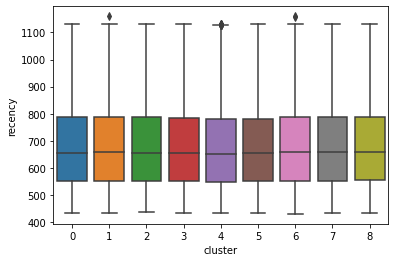

In [129]:
sns.boxplot(x='cluster', y='recency', data=rfm_normal)

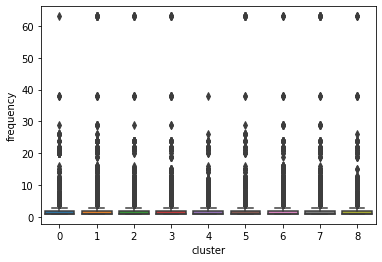

In [130]:
sns.boxplot(x='cluster', y='frequency', data=rfm_normal)

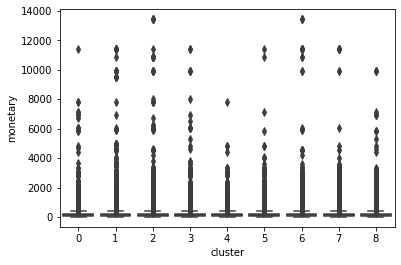

In [131]:
sns.boxplot(x='cluster', y='monetary', data=rfm_normal)